<a href="https://colab.research.google.com/github/Ryrung/Codestates-Project1/blob/main/cp1_lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

In [ ]:
!unzip /content/drive/MyDrive/car-detection.zip

Archive:  /content/drive/MyDrive/car-detection.zip
  inflating: data1a/training/00-damage/0001.JPEG  
  inflating: data1a/training/00-damage/0002.JPEG  
  inflating: data1a/training/00-damage/0003.JPEG  
  inflating: data1a/training/00-damage/0004.JPEG  
  inflating: data1a/training/00-damage/0005.JPEG  
  inflating: data1a/training/00-damage/0006.JPEG  
  inflating: data1a/training/00-damage/0007.JPEG  
  inflating: data1a/training/00-damage/0008.JPEG  
  inflating: data1a/training/00-damage/0009.JPEG  
  inflating: data1a/training/00-damage/0010.JPEG  
  inflating: data1a/training/00-damage/0011.JPEG  
  inflating: data1a/training/00-damage/0012.JPEG  
  inflating: data1a/training/00-damage/0013.JPEG  
  inflating: data1a/training/00-damage/0014.JPEG  
  inflating: data1a/training/00-damage/0015.JPEG  
  inflating: data1a/training/00-damage/0016.JPEG  
  inflating: data1a/training/00-damage/0017.JPEG  
  inflating: data1a/training/00-damage/0018.JPEG  
  inflating: data1a/training/00

In [ ]:
# 경로 설정
base_dir = '/content/data1a'
train_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')

In [ ]:
#defining the damage and whole , train nand validation directory
train_damage_dir = os.path.join(train_dir, '00-damage')
train_whole_dir = os.path.join(train_dir, '01-whole')
validation_damage_dir = os.path.join(validation_dir, '00-damage')
validation_whole_dir = os.path.join(validation_dir, '01-whole')

In [ ]:
#data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150), 
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [ ]:
#Basic model
from tensorflow.keras import Model 
from tensorflow.keras.applications import DenseNet121   

base_model = DenseNet121(input_shape = (150, 150, 3),  include_top = False, weights = 'imagenet') 

x= tf.keras.layers.Flatten()(base_model.output)
x= tf.keras.layers.Dense(512, activation='relu')(x) 
x= tf.keras.layers.Dense(1, activation='sigmoid')(x) 

model= Model( base_model.input, x)

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['Accuracy','Precision','Recall'])

#training the model
history = model.fit(
      train_generator,
      epochs=15,
      validation_data=validation_generator,
      verbose=2)

29084464/29084464 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/15
92/92 - 50s - loss: 0.4571 - Accuracy: 0.8609 - precision: 0.8689 - recall: 0.8500 - val_loss: 0.8357 - val_Accuracy: 0.8239 - val_precision: 0.7459 - val_recall: 0.9826 - 50s/epoch - 546ms/step
Epoch 2/15
92/92 - 17s - loss: 0.1396 - Accuracy: 0.9451 - precision: 0.9505 - recall: 0.9391 - val_loss: 0.3114 - val_Accuracy: 0.9348 - val_precision: 0.9098 - val_recall: 0.9652 - 17s/epoch - 182ms/step
Epoch 3/15
92/92 - 15s - loss: 0.0905 - Accuracy: 0.9723 - precision: 0.9728 - recall: 0.9717 - val_loss: 0.6856 - val_Accuracy: 0.9087 - val_precision: 0.9896 - val_recall: 0.8261 - 15s/epoch - 168ms/step
Epoch 4/15
92/92 - 16s - loss: 0.0496 - Accuracy: 0.9875 - precision: 0.9870 - recall: 0.9880 - val_loss: 0.5278 - val_Accuracy: 0.9283 - val_precision: 0.8863 - val_recall: 0.9826 - 16s/epoch - 169ms/step
Epoch 5/15
92/92 - 18s - loss: 0.0517 - Accuracy: 0.9891 - precision: 0.9913 - recall: 0.9870 - val_loss: 0.5593 - val_Accuracy: 0.9326 - val_precision: 0.9854 - val_recall: 0.

In [ ]:
#weights saving
model.save("classifier.h5")

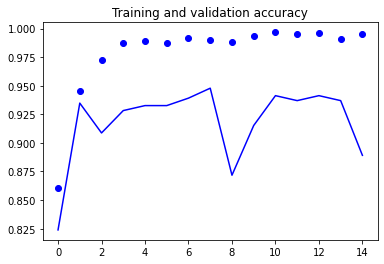

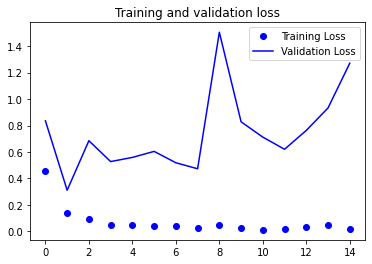

In [ ]:
acc = history.history['Accuracy']
val_acc = history.history['val_Accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

1/1 [==============================] - 3s 3s/step
The car is damaged


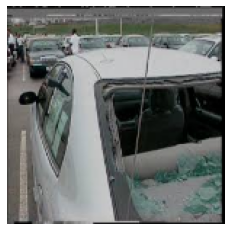

In [ ]:
im = cv2.imread("/content/data1a/validation/00-damage/0021.JPEG")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (150, 150)) 
imS=im.reshape([1,150,150,3])
pred=model.predict(np.array(imS))
if pred[0][0] > 0.5:
    print("The car is damaged")
else:
    print("The car is not damaged")
plt.axis("off")
plt.imshow(im)

1/1 [==============================] - 0s 31ms/step
[[0.]]
The car is not damaged


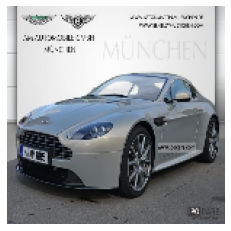

In [ ]:
im = cv2.imread("/content/data1a/validation/01-whole/0013.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (150, 150)) 
imS=im.reshape([1,150,150,3])
pred=model.predict(np.array(imS))
print(pred)
if pred[0][0] > 0:
    print("The car is damaged")
else:
    print("The car is not damaged")
plt.axis("off")
plt.imshow(im)

In [ ]:
# LeNet-5
%load_ext tensorboard

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, Dropout

In [ ]:
class LeNet(Sequential):
    def __init__(self, input_shape, nb_classes):
        super().__init__()

        self.add(Conv2D(6, kernel_size=(5,5), strides=(1,1), activation='relu',
                        input_shape=input_shape, padding="same"))
        self.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
        self.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), activation='relu', padding='valid'))
        self.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
        self.add(Flatten())
        self.add(Dense(120, activation='relu'))
        self.add(Dense(84, activation='relu'))
        self.add(Dense(nb_classes, activation='softmax'))

        self.compile(optimizer='adam',
                     loss=categorical_crossentropy,
                     metrics=['accuracy'])

num_classes = 2

model2 = LeNet((150,150,3), num_classes)
model2.summary()

Model: "le_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 6)       456       
                                                                 
 average_pooling2d (AverageP  (None, 75, 75, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 71, 71, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 35, 35, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 19600)             0         
                                                                 
 dense_2 (Dense)             (None, 120)               23521

In [ ]:
# 파라미터 초기화 및 데이터 호출

EPOCHS = 100
BATCH_SIZE = 32
image_height = 150
image_width = 150
train_dir = os.path.join(base_dir, 'training')
valid_dir = os.path.join(base_dir, 'validation')

In [ ]:
# 이미지 데이터 증가
train = ImageDataGenerator(
          rescale=1./255,
          rotation_range=10,
          width_shift_range=0.1,
          height_shift_range=0.1,
          shear_range=0.1,
          zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir, 
                                            target_size=(image_height, image_width),
                                            color_mode="rgb",
                                            batch_size=BATCH_SIZE,
                                            seed=1,
                                            shuffle=True,
                                            class_mode="categorical")
valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir, 
                                            target_size=(image_height, image_width),
                                            color_mode="rgb",
                                            batch_size=BATCH_SIZE,
                                            seed=7,
                                            shuffle=True,
                                            class_mode="categorical")

train_num = train_generator.samples
valid_num = valid_generator.samples

Found 1840 images belonging to 2 classes.
Found 460 images belonging to 2 classes.


In [ ]:
# 텐서보드에 모델 훈련 과정 살펴보기

model2.fit(train_generator,
          epochs=EPOCHS,
          validation_data=valid_generator,
          validation_steps=valid_num // BATCH_SIZE,
          verbose=1)

Epoch 1/100
58/58 [==============================] - 19s 320ms/step - loss: 0.6900 - accuracy: 0.5859 - val_loss: 0.6378 - val_accuracy: 0.6250
Epoch 2/100
58/58 [==============================] - 18s 314ms/step - loss: 0.6270 - accuracy: 0.6679 - val_loss: 0.6043 - val_accuracy: 0.6518
Epoch 3/100
58/58 [==============================] - 20s 343ms/step - loss: 0.5988 - accuracy: 0.6859 - val_loss: 0.6145 - val_accuracy: 0.6451
Epoch 4/100
58/58 [==============================] - 21s 366ms/step - loss: 0.5780 - accuracy: 0.7038 - val_loss: 0.5192 - val_accuracy: 0.7790
Epoch 5/100
58/58 [==============================] - 17s 299ms/step - loss: 0.5508 - accuracy: 0.7185 - val_loss: 0.4912 - val_accuracy: 0.7790
Epoch 6/100
58/58 [==============================] - 19s 322ms/step - loss: 0.5306 - accuracy: 0.7386 - val_loss: 0.4790 - val_accuracy: 0.7746
Epoch 7/100
58/58 [==============================] - 17s 299ms/step - loss: 0.5316 - accuracy: 0.7484 - val_loss: 0.4733 - val_accuracy:

1/1 [==============================] - 0s 83ms/step


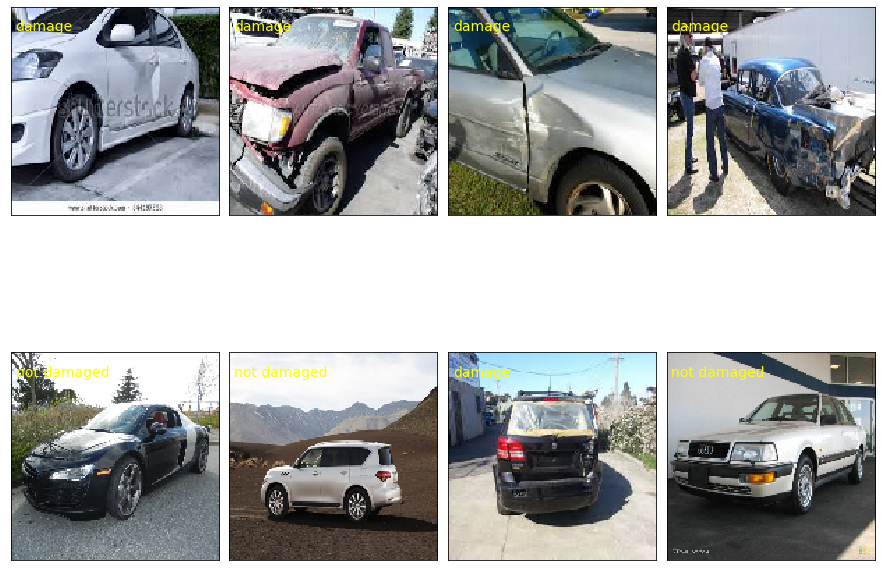

In [ ]:
# 이미지 데이터셋 분류에 대한 예측

class_names = ['damage', 'not damaged']
validation, label_batch = next(iter(valid_generator))
prediction_values = model2.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.5, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2,4, i+1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
    
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)

In [ ]:
#weights saving
model2.save("classifier2.h5")

1/1 [==============================] - 0s 162ms/step
The car is damaged


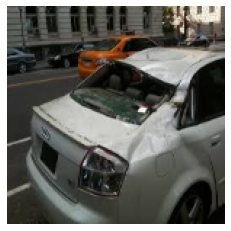

In [ ]:
im = cv2.imread("/content/data1a/validation/00-damage/0005.JPEG")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (150, 150)) 
imS=im.reshape([1,150,150,3])
pred=model2.predict(np.array(imS))
if pred[0][0] > 0.5:
    print("The car is damaged")
else:
    print("The car is not damaged")
plt.axis("off")
plt.imshow(im)

1/1 [==============================] - 0s 20ms/step
[[0. 1.]]
The car is not damaged


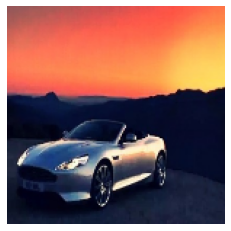

In [ ]:
im = cv2.imread("/content/data1a/validation/01-whole/0014.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (150, 150)) 
imS=im.reshape([1,150,150,3])
pred=model2.predict(np.array(imS))
print(pred)
if pred[0][0] > 0.5:
    print("The car is damaged")
else:
    print("The car is not damaged")
plt.axis("off")
plt.imshow(im)